# 3. 신경망
* 이전 퍼셉트론으로 두 가지를 확인
    1. 퍼셉트론으로 복잡한 함수도 표현할 수 있음
    2. 가중치를 설정하는 작업을 수동으로 진행

* 신경망은 이 중, 1번은 유지하면서 2번을 해결

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예
* 신경망은 간단히 아래 그림과 같음
<img src="../img/3-1.jpg" width="400"></img>
* 은닉층은 나머지 두 층과 달리 사람 눈에 보이지 않음

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" ></script>

### 3.1.2 퍼셉트론 복습
* 이 전장에서 말한 것과 같이 퍼셉트론은 다음과 같은 구조와 식[식3.1]을 가지고 있음
<img src="../img/2-1.jpg" width="250"></img>

\\[ y =
  \begin{cases}
    0  & \quad (b + w_1 x_1 + w_2 x_2 \leq 0)\\
    1  & \quad (b + w_1 x_1 + w_2 x_2 > 0)\\
  \end{cases}
\\]

* 그런데 이 네트워크에서는 편향 \\(b\\)가 보이지 않음
    * 따라서 이를 명시하면 다음과 같음
<img src="../img/3-3.jpg" width="250"></img>

* 더하여 위 식을 간단한 형태로 표시하면 다음식[식3.2, 식 3.3]과 같음

\\[ y = h(b + w_1 x_1 + w_2 x_2) \\]

\\[ h(x) =
  \begin{cases}
    0  & \quad (x \leq 0)\\
    1  & \quad (x > 0)\\
  \end{cases}
\\]

### 3.1.3 활성화 함수 등장
* 방금 본 두 식에서 사용된 \\(h(x)\\)는 일반적으로 \\(\text{활성화 함수}^{activation funtion} \\)라고 함
* 이 활성화 함수를 다시 두 식으로 나누면 다음식[식3.4, 식 3.5]과 같음
\\[ a = b + w_1 x_1 + w_2 x_2 \\]
\\[ y = h(a) \\]

* 그리고 이를 그림으로 그리면 다음과 같음
<img src="../img/3-4.jpg" width="250"></img>

## 3.2 활성화 함수
* 앞에서 본 [식3.3]은 임계값을 경계로 값이 바뀌는데, 이런 함수는 \\(\text{계단 함수}^{step funtion} \\)라고 함
* 즉 지금까지는 "퍼셉트론에서 활성화 함수로 '계단 함수'를 사용했다."는 것
* 이제 다양한 활성화 함수에 대해 소개함

### 3.2.1 시그모이드 함수
* 다음은 신경망에서 자주 이용하는 \\({\text{시그모이드 함수}}^{sigmoid funtion} \\)를 나타낸 식[식3.6]이다.
\\[ h(x) = \frac{1}{1+\text{exp}(-x)} \\]
* 여기서 \\(\text{exp}(-x)\\)는 \\(e^{-x}\\)를  뜻함

### 3.2.2 계단함수 구현하기

In [14]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
print step_funtion(3.0)

1


In [3]:
y = np.array([3.0, 2.0])

NameError: name 'np' is not defined

In [15]:
def step_function2(x):
    y = x > 0;
    return y.astype(np.int)

In [8]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print x

[-1.  1.  2.]


In [9]:
y = x > 0
print y

[False  True  True]


In [10]:
y = y.astype(np.int)
print y

[0 1 1]


### 3.2.3 계단 함수의 그래프

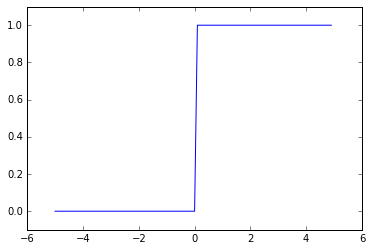

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function2(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [22]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [18]:
x = np.array([-1.0, 1.0, 2.0])
print signmoid(x)

[ 0.26894142  0.73105858  0.88079708]


* 이런 연산이 되는 이유는 '브로드 캐스트'

In [20]:
t = np.array([-1.0, 2.0, 3.0])
print 1.0 + t
print 1.0 / t

[ 0.  3.  4.]
[-1.          0.5         0.33333333]


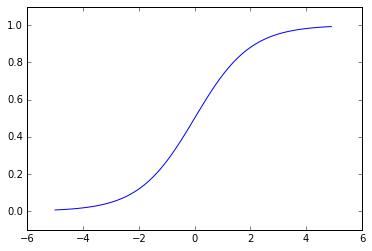

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단함수 비교

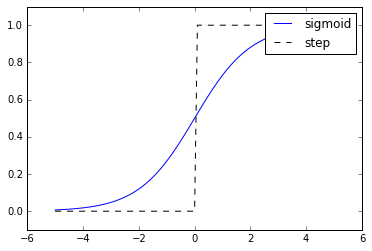

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function2(x)

plt.plot(x, y1, label="sigmoid")
plt.plot(x, y2, 'k--', label="step")
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.legend()
plt.show()

### 3.2.6 비선형 함수
* 계단 함수와 시그모이드 함수의 가장 큰 공통점은 둘 모두 <b>비선형 함수</b>라는 것
* 신경망에서는 비선형 함수를 사용해야 함

* 그 이유는 '신경망을 깊게 하는 의미'가 없어지기 때문
* 간단한 예시로 설명하자면,
    * 선형함수 \\(h(x) = cx\\)를 활성화 함수로 사용한 3층 네트워크를 작성
    * 네트워크는 \\(y(x) = h(h(h(x)))\\)
    * 이는 \\(y(x) = c * c * c * x\\)의 연산을 수행
    * \\(y(x) = ax\\)에서 \\(a = c^3\\)이라하면 위와 동일한 식임
    * 즉 '은닉층이 없는 네트워크'로 대체할 수 있음

### 3.2.7 ReLU 함수
* 최근에 자주 사용되는 \\({\text{ReLU}}^{Rectified Linear Unit} \\)함수를 주로 사용
* 이 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이 하면 0을 출력하는 함수
* 이를 식으로 나탄내면 아래와 같음 [식 3.7]
\\[ h(x) =
  \begin{cases}
    0 & \quad (x \leq 0)\\
    x  & \quad (x > 0)\\
  \end{cases}
\\]

In [31]:
def relu(x):
    return np.maximum(0, x)

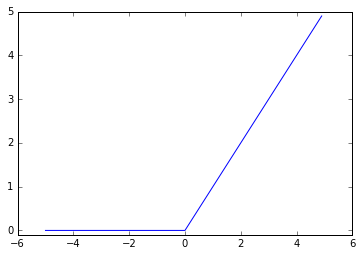

In [33]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 5) # y축 범위 지정
plt.show()

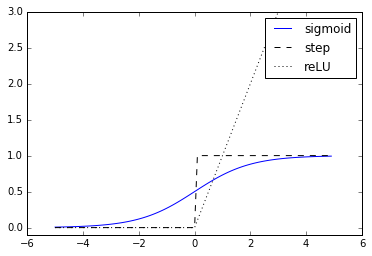

In [36]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function2(x)
y3 = relu(x)

plt.plot(x, y1, label="sigmoid")
plt.plot(x, y2, 'k--', label="step")
plt.plot(x, y3, 'k:', label="reLU")
plt.ylim(-0.1, 3) # y축 범위 지정
plt.legend()
plt.show()

## 3.3 다차원 배열의 계산
* 다차원 배열 계산에 숙달하면, 신경망을 효율적으로 구현할 수 있음
* numpy의 다차원 배열 계산에 대해 설명

### 3.3.1 다차원 배열
* 다차원 배열 : 숫자의 집합
* 다음은 지금까지 보아온 1차원 배열

In [1]:
import numpy as np
A = np.array([1, 2, 3, 4])
print (A)

[1 2 3 4]


In [2]:
np.ndim(A)

1

In [3]:
A.shape

(4L,)

In [4]:
A.shape[0]

4L

In [5]:
print A.shape
print A.shape[0]

(4L,)
4


In [6]:
B = np.array([[1,2],[3,4],[5,6]])
print (B)

[[1 2]
 [3 4]
 [5 6]]


In [7]:
np.ndim(B)

2

In [9]:
B.shape

(3L, 2L)

* 위 1차원 배열의 shape 결과 값이 튜플인 것은 3차원, 4차원에 대한 결과와 동일하기 위함
* 아래 2차원 배열의 shape 결과 값 (3, 2)는 배열 3 X 2와 동일한 뜻
<img src="../img/3-10.jpg" width="500"></img>

### 3.3.2 행렬의 내적 (행렬 곱)
* 행렬곱 계산 방법
<img src="../img/3-11.jpg" width="700"></img>
* 이를 Python으로 구현하면 다음과 같음

In [11]:
A = np.array([[1,2],[3,4]])
A.shape

(2L, 2L)

In [12]:
B = np.array([[5,6], [7,8]])
B.shape

(2L, 2L)

In [13]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [14]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2], [3,4],[5,6]])
A.shape

(2L, 3L)

In [15]:
B.shape

(3L, 2L)

In [16]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [18]:
C = np.array([[1,2],[3,4]])
C.shape

(2L, 2L)

In [19]:
A.shape

(2L, 3L)

In [21]:
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### 3.3.3 신경망의 내적
* 간단한 신경망을 가정한 후 이를 구현
* 여기서는 편향과 활성화 함수를 생략하여, 가중치만 가짐
<img src="../img/3-14.jpg" width="1000"></img>

In [22]:
X = np.array([1, 2])
X.shape

(2L,)

In [24]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print (W)

[[1 3 5]
 [2 4 6]]


In [25]:
W.shape

(2L, 3L)

In [27]:
Y = np.dot(X, W)
print (Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기
* 입력부터 출력까지의 처리(순방향 처리)에 대해 구현함
<img src="../img/3-15.jpg" width="1000"></img>

### 표기법 설명
<img src="../img/3-16.jpg" width="1000"></img>

### 3.4.2 각 층의 신호 전달 구현하기
<img src="../img/3-17.jpg" width="1000"></img>

* 이 그림에서 \\(a_1^{(1)}\\)을 수식으로 나타내면 다음 [식 3.8]과 같음

\\[ {a_1}^{(1)} = {w_1}^{(1)}_1x_1 + {w_1}^{(1)}_2x_2 + b_1^{(1)} \\]

* 여기서 행렬의 내적을 이용하면 1층의 '가중치 부분'을 다음 식처럼 간소화 가능
\\[ {A}^{(1)} = XW^{(1)} + B^{(1)} \\]

* 이때 행렬 \\( A^{(1)}, X, B^{(1)}, W^{(1)}\\)은 다음과 같음
\\[ A^{(1)} = ({a_1}^{(1)} {a_2}^{(1)} {a_3}^{(1)}), X = ( x_1 x_2), B^{(1)} = (b_1^{(1)} b_2^{(1)} b_3^{(1)}) \\]
\\[ W^{(1)} = 
\begin{pmatrix}
{w_1}^{(1)}_1 & {w_2}^{(1)}_1 & {w_3}^{(1)}_1 \\
{w_1}^{(1)}_2 & {w_2}^{(1)}_2 & {w_3}^{(1)}_2 \\
\end{pmatrix}
\\]

In [2]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2L, 3L)
(2L,)
(3L,)


In [4]:
A1 = np.dot(X, W1) + B1
print(A1)

[ 0.3  0.7  1.1]


* 이에 더하여 활성화 함수 (여기서는 시그모이드 함수) 처리를 구현
<img src="../img/3-18.jpg" width="1000"></img>

In [20]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

In [9]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


* 그리고 다음으로 1층에서 2층으로 가는 과정 [그림 3.19]을 구현
<img src="../img/3-19.jpg" width="1000"></img>

In [10]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3L,)
(3L, 2L)
(2L,)


In [11]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


* 마지막으로 2층에서 출력층으로의 신호전달 [그림 3.20]
<img src="../img/3-20.jpg" width="1000"></img>

In [14]:
def identity_function(x) :
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)

[ 0.31682708  0.69627909]


* 여기서 항등함수 identity_function을 구현하여 사용
    * 기존 은닉층 코드와의 통일성을 위해 사용
    * [그림 3.20]에서는 \\( \sigma() \\)로 표시

In [23]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()

x = np.array([1.0, .05])
y = forward(network, x)
print(y)

[ 0.31398696  0.68997435]


* init_network() : 가중치와 편향을 초기화 후 dictionary변수 network에 저장
*      forward() : 입력 신호를 출력으로 변환하는 일련의 처리과정 (순전파)

## 3.5 출력층 설계하기
* 신경망은 <b>분류</b>와 <b>회귀</b>에 모두 이용가능
* 그러나 출력층에서 사용하는 활성화 함수가 다름
    * 회귀 : 항등함수
    * 분류 : 소프트맥스 함수

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
* \\({\text{항등 함수}}^{identity function} \\)는 입력을 그대로 출력
<img src="../img/3-21.jpg" width="250"></img>

* \\({\text{소프트맥스 함수}}^{softmax function} \\)의 식은 다음과 같음 [식 3.10]
\\[ 
y_k = \cfrac{\text{exp}(a_k)}{\displaystyle\sum_i^n \text{exp}(a_i)}
\\]

* 여기서 exp\\((x)\\)는 \\(e^x\\)를 뜻하는 \\(\text{지수함수}^{exponential function}\\)
* n은 출력층의 뉴런 수
* \\(y_k\text{는 그중 }k\\)번째 출력임을 뜻함
* 정리
    * 분자 : 입력신호 \\(a_k\\)의 지수함수
    * 분모 : 모든 입력신호의 지수함수의 합

* 이를 그림으로 나타내면 다음 [그림 3.22]와 같음
<img src="../img/3-22.jpg" width="250"></img>

* 이제 소프트 맥스 함수를 구현

In [3]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [4]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542102


In [5]:
y = exp_a / sum_exp_a
print(y)

[ 0.01821127  0.24519181  0.73659691]


* 이를 하나의 함수로 구현하면 다음과 같음

In [6]:
def softmax(a) :
    exp_a = np.array(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점
* 컴퓨터로 계산하는 경우 오버플로우 문제가 있음
* 지수 함수의 특성상 굉장히 큰 값을 반환하며, 이 값들로 나눌 경우 결과가 '불안정'해짐

* 따라서 다음과 같이 식을 개선함
\\[ 
y_k = \cfrac{\text{exp}(a_k)}{\displaystyle\sum_i^n \text{exp}(a_i)} = \cfrac{C \text{exp}(a_k)}{C\displaystyle\sum_i^n \text{exp}(a_i)}
= \cfrac{\text{exp}(a_k+logC)}{\displaystyle\sum_i^n \text{exp}(a_i+logC)} = \cfrac{\text{exp}(a_k+C')}{\displaystyle\sum_i^n \text{exp}(a_i+C')}
\\]

* 다음은 오류 예시와 개선 결과임

In [7]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [8]:
c = np.max(a)
a-c

array([  0, -10, -20])

In [9]:
np.exp(a-c) / np.sum(exp_a)

array([  1.34912431e-02,   6.12501488e-07,   2.78075245e-11])

* 이를 개선된 코드로 구현하면 다음과 같음

In [17]:
def softmax2(a) :
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [18]:
a = np.array([0.3, 2.9, 4.0])
y1 = softmax(a)
y2 = softmax2(a)

print(y1)
print(y2)

[ 0.04166667  0.40277778  0.55555556]
[ 0.01821127  0.24519181  0.73659691]


### 3.5.3 소프트맥스 함수의 특징

In [20]:
print(np.sum(y1))
print(np.sum(y2))

1.0
1.0


* 위 처럼 소프트맥스 함수의 출력은 0과 1.0 사이 값이며, 출력의 총합은 1임
* 소프트맥스 함수의 출력을 '확률'로 해석할 수 있음
    * 그러나 각 원소의 대소관계는 변하지 않음
    * 일반적인 신경망 분류에서는 가장 큰 출력으로 인식
    * 따라서, 소프트맥스 함수를 사용하지 않기도 함

### 3.5.4 출력층 뉴련 수 정하기
* 출력층 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함
* 다음은 0~9의 숫자 중 하나로 분류하는 문제의 예시
<img src="../img/3-23.jpg" width="700"></img>
* 출력층은 각각 숫자와 대응하며, 그림의 뉴런 농도가 출력값을 의미함